In [1]:
import numpy as np 
import pandas as pd

df = pd.read_parquet("data/yellow_tripdata_2025-08.parquet", engine='fastparquet')

In [2]:
df = df [['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount',
       'total_amount']]

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
0,2,2025-08-01 00:52:23,2025-08-01 01:12:20,1.0,8.44,1.0,138,141,1,33.80,6.0,0.5,5.00,6.94,57.49
1,2,2025-08-01 00:03:01,2025-08-01 00:15:33,2.0,4.98,1.0,138,193,1,21.20,6.0,0.5,0.00,0.00,30.45
2,7,2025-08-01 00:24:38,2025-08-01 00:24:38,2.0,1.89,1.0,249,45,1,14.20,0.0,0.5,3.99,0.00,23.94
3,7,2025-08-01 00:48:19,2025-08-01 00:48:19,1.0,2.35,1.0,79,229,1,11.40,0.0,0.5,3.43,0.00,20.58
4,2,2025-08-01 00:25:34,2025-08-01 00:33:18,1.0,2.14,1.0,43,48,1,11.40,1.0,0.5,2.57,0.00,19.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574086,2,2025-08-31 23:40:30,2025-08-31 23:58:48,NaN,3.12,NaN,65,228,0,21.53,0.0,0.5,0.00,0.00,23.03
3574087,2,2025-08-31 23:10:26,2025-08-31 23:29:01,NaN,5.92,NaN,236,148,0,21.78,0.0,0.5,0.00,0.00,26.53
3574088,2,2025-08-31 23:04:21,2025-08-31 23:25:21,NaN,4.10,NaN,148,48,0,-4.75,0.0,0.5,0.00,0.00,5.83
3574089,2,2025-08-31 23:44:26,2025-08-31 23:44:42,NaN,0.02,NaN,107,107,0,12.67,0.0,0.5,0.00,0.00,17.42


In [4]:
df['trip_distance'].unique()

array([ 8.44,  4.98,  1.89, ..., 54.6 , 63.84, 38.35])

In [5]:
col = 'RatecodeID'
df[col] = df[col].fillna(99)
df[col].value_counts()

RatecodeID
1.0     2446064
99.0     956617
2.0      102947
5.0       43088
3.0       13569
4.0       11802
6.0           4
Name: count, dtype: int64

In [6]:
col = 'passenger_count'
df[col] = df[col].fillna(1)
df[col] = df[col].replace(0, 1)
df[col].value_counts()

passenger_count
1.0    2988278
2.0     385427
3.0     104083
4.0      79650
5.0      10545
6.0       6099
8.0          4
9.0          3
7.0          2
Name: count, dtype: int64

In [7]:
df['trip_distance'].value_counts()

trip_distance
0.00     105184
0.90      32789
1.00      32601
1.10      32074
1.20      31215
          ...  
53.30         1
52.31         1
36.89         1
38.21         1
38.35         1
Name: count, Length: 5168, dtype: int64

In [8]:
df = df[df['fare_amount'] > 0]

df['fare_amount'].unique()

array([33.8 , 21.2 , 14.2 , ..., 74.26, 66.45, 80.07])

In [9]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
total_amount             0
dtype: int64

In [10]:
df = df[df['trip_distance'] > 0.00]

df['trip_distance'].unique()

array([ 8.44,  4.98,  1.89, ..., 75.27, 63.84, 38.35])

In [11]:
df['Duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'].copy()

In [12]:
df['Duration'].describe()

count                   3227048
mean     0 days 00:17:21.325468
std      0 days 00:28:16.839088
min           -1 days +20:31:07
25%             0 days 00:08:05
50%             0 days 00:13:22
75%             0 days 00:21:20
max             7 days 20:15:50
Name: Duration, dtype: object

In [13]:
df[df['Duration'] < '0 days 00:00:00']


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,Duration
990716,1,2025-08-12 16:00:00,2025-08-12 12:31:07,1.0,6.5,99.0,231,74,1,35.5,0.0,0.5,0.0,0.0,36.0,-1 days +20:31:07
1455795,1,2025-08-17 17:44:00,2025-08-17 17:28:39,1.0,5.6,99.0,37,91,1,27.5,0.0,0.5,0.0,0.0,28.0,-1 days +23:44:39


In [14]:
df = df[df['Duration'] > '0 days 00:00:00']
df = df[df['Duration'] < '1 days 00:00:00']

df['Duration'].describe()

count                   3180852
mean     0 days 00:17:34.485805
std      0 days 00:25:28.495049
min             0 days 00:00:01
25%             0 days 00:08:18
50%             0 days 00:13:33
75%             0 days 00:21:30
max             0 days 23:59:48
Name: Duration, dtype: object

In [15]:
df = df[(df['Duration'] >= pd.Timedelta(minutes=1)) &
        (df['Duration'] <= pd.Timedelta(hours=3))]

df['Duration'].describe()

count                   3168191
mean     0 days 00:17:15.789299
std      0 days 00:13:38.126714
min             0 days 00:01:00
25%             0 days 00:08:21
50%             0 days 00:13:35
75%             0 days 00:21:32
max             0 days 02:59:51
Name: Duration, dtype: object

In [16]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,Duration
0,2,2025-08-01 00:52:23,2025-08-01 01:12:20,1.0,8.44,1.0,138,141,1,33.80,6.0,0.5,5.00,6.94,57.49,0 days 00:19:57
1,2,2025-08-01 00:03:01,2025-08-01 00:15:33,2.0,4.98,1.0,138,193,1,21.20,6.0,0.5,0.00,0.00,30.45,0 days 00:12:32
4,2,2025-08-01 00:25:34,2025-08-01 00:33:18,1.0,2.14,1.0,43,48,1,11.40,1.0,0.5,2.57,0.00,19.72,0 days 00:07:44
5,2,2025-08-01 00:16:36,2025-08-01 00:33:41,1.0,3.06,1.0,114,230,2,18.40,1.0,0.5,0.00,0.00,24.15,0 days 00:17:05
6,2,2025-08-01 00:56:02,2025-08-01 01:15:37,1.0,5.25,1.0,163,13,1,24.70,1.0,0.5,1.00,0.00,31.45,0 days 00:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574083,2,2025-08-31 23:46:50,2025-08-31 23:56:58,1.0,2.43,99.0,231,186,0,14.08,0.0,0.5,0.00,0.00,18.83,0 days 00:10:08
3574084,2,2025-08-31 23:39:28,2025-08-31 23:59:08,1.0,4.55,99.0,112,144,0,28.05,0.0,0.5,0.00,0.00,32.80,0 days 00:19:40
3574085,2,2025-08-31 23:57:16,2025-09-01 00:04:19,1.0,1.38,99.0,90,230,0,12.25,0.0,0.5,0.00,0.00,17.00,0 days 00:07:03
3574086,2,2025-08-31 23:40:30,2025-08-31 23:58:48,1.0,3.12,99.0,65,228,0,21.53,0.0,0.5,0.00,0.00,23.03,0 days 00:18:18


Text(0, 0.5, 'trips')

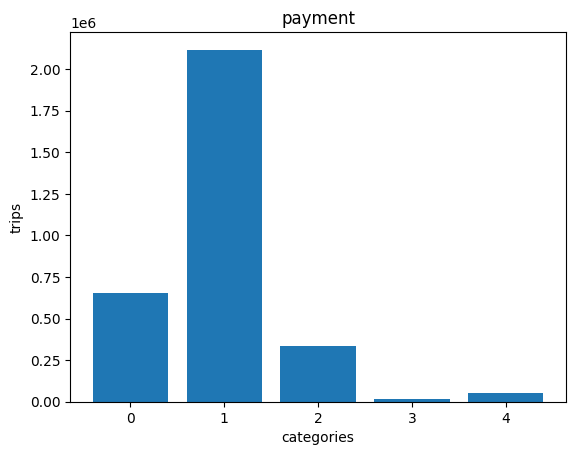

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

category = df["payment_type"].value_counts()

plt.bar(category.index, category.values)

plt.title("payment")
plt.xlabel("categories")
plt.ylabel("trips")

ConversionError: Failed to convert value(s) to axis units: array([Timedelta('0 days 00:19:57'), Timedelta('0 days 00:12:32'),
       Timedelta('0 days 00:07:44'), ..., Timedelta('0 days 00:07:03'),
       Timedelta('0 days 00:18:18'), Timedelta('0 days 00:18:35')],
      dtype=object)

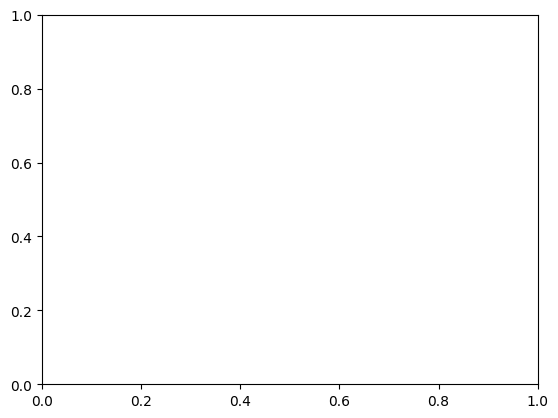

In [23]:
plt.hist(df [df["total_amount"] < 100])
plt.xlabel("total_amount")
plt.ylabel("trips")

<Axes: >

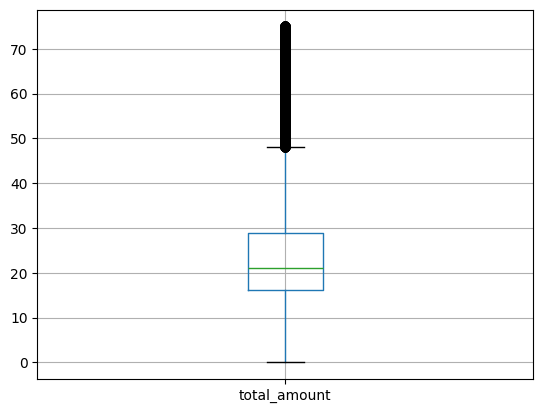

In [22]:
df[df['total_amount'] < 75].boxplot(column = ['total_amount'])

<Axes: xlabel='total_amount', ylabel='trip_distance'>

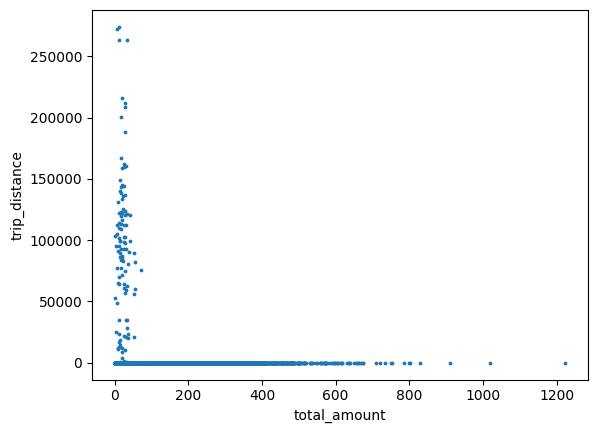

In [19]:
# plt.plot(df['total_amount'], df['trip_distance'])
# plt.show()

df.plot.scatter(x = 'total_amount', y = 'trip_distance', s =3)

ValueError: x and y must have same first dimension, but have shapes (3168191,) and (1,)

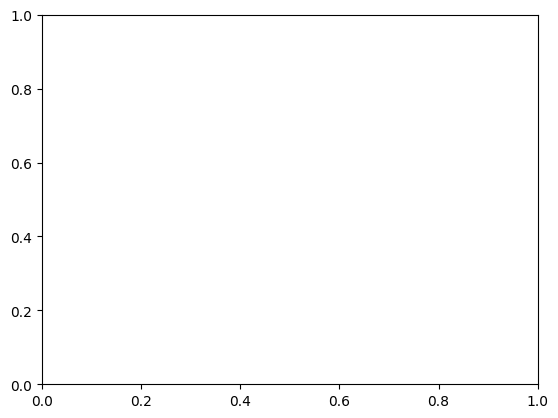

In [26]:
plt.plot(df['passenger_count'], df['passenger_count'].value_counts, marker= '*')
plt.show()